# The method for saving model

-------

# 0 .기존 작업

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import tensorflow as tf

In [2]:
(x, y), (x_test, y_test) = mnist.load_data()

In [3]:
from tensorflow.keras.utils import to_categorical

In [4]:
x = x.astype('float32') 
x_test = x_test.astype('float32')

x /= 255
x_test /= 255

y = to_categorical(y, 10)
y_test = to_categorical(y_test, 10)

x = x.reshape(60000,-1)
x_test = x_test.reshape(10000,-1) 

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
def create_model():
    model = Sequential()
    model.add(Dense(units=32, activation='relu', input_shape=(28*28,)))
    model.add(Dense(64, 'relu'))
    model.add(Dense(128, 'relu'))
    model.add(Dense(units=10, activation='softmax'))
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                 metrics=['accuracy'])

    return model

-------------

In [7]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 36,842
Trainable params: 36,842
Non-trainable params: 0
_________________________________________________________________


In [8]:
history = model.fit(x, y, validation_split=1/6, epochs=5, batch_size=512)

Epoch 1/5
98/98 [==============================] - 1s 15ms/step - loss: 0.8434 - accuracy: 0.7624 - val_loss: 0.3050 - val_accuracy: 0.9125
Epoch 2/5
98/98 [==============================] - 1s 10ms/step - loss: 0.2982 - accuracy: 0.9144 - val_loss: 0.2362 - val_accuracy: 0.9310
Epoch 3/5
98/98 [==============================] - 1s 10ms/step - loss: 0.2417 - accuracy: 0.9297 - val_loss: 0.2030 - val_accuracy: 0.9413
Epoch 4/5
98/98 [==============================] - 1s 10ms/step - loss: 0.2030 - accuracy: 0.9406 - val_loss: 0.1824 - val_accuracy: 0.9476
Epoch 5/5
98/98 [==============================] - 1s 10ms/step - loss: 0.1806 - accuracy: 0.9469 - val_loss: 0.1671 - val_accuracy: 0.9515


In [9]:
import matplotlib.pyplot as plt

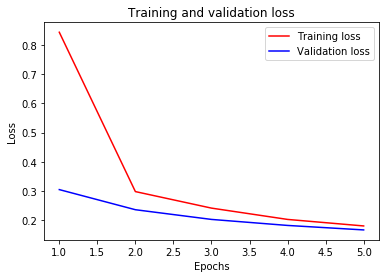

In [10]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'r', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()      

plt.show()

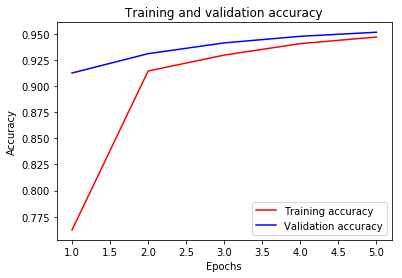

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

------

## 1. Model 저장하기

### 0) 배경지식

#### 1> HDF5

- Hierarchical Data Format의 약자
- data를 구조적으로 관리해 과학자들이 주로 사용
- 공용 파일이어서 어느 언어로든지 읽을 수 있습니다.

#### 2> tensorflow 홈페이지에 가면

https://www.tensorflow.org/learn

모바일용, javascript 용이 있습니다. 핸드폰으로 모델 학습시켜서 해당 자료가 있는 것이 아닙니다.

train은 많은 연산이 필요하지만 predict 자체는 행렬만 곱하는 forward propagation입니다.

그래서 train은 고성능 GPU로 진행하고 predict 과정만 모바일이나 웹에서도 할 수 있게 하려고 합니다.

#### 그러기 위해서는 모델 저장은 공용 파일로 해야합니다.


#### 3> **'모델을 저장한다'**의 의미

- model의 architecture
- model의 weight 값들

---------

### 1) model 전체

- 모델 전체를 저장하면 나중에 predict만 하는 것도 가능합니다.

#### 1> 저장

In [12]:
model.save('my_model.h5')

#### 2> 불러오기

In [13]:
from tensorflow.keras.models import load_model

In [14]:
new_model = load_model('my_model.h5')

In [15]:
new_model.predict(x_test[0:9]).shape

(9, 10)

In [16]:
np.argmax(new_model.predict(x_test[0:9]), axis=1)

array([7, 2, 1, 0, 4, 1, 4, 9, 6], dtype=int64)

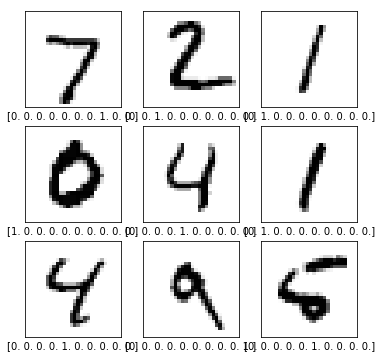

In [17]:
plt.figure(figsize=(6,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test.reshape(10000,28,28)[i], cmap=plt.cm.binary)
    plt.xlabel(str(y_test[i]))
plt.show()

### 2) model의 architecture 저장

#### 1> 저장

In [18]:
json_string = model.to_json()

In [19]:
json_string

'{"config": {"name": "sequential", "layers": [{"config": {"batch_input_shape": [null, 784], "sparse": false, "dtype": "float32", "name": "dense_input", "ragged": false}, "class_name": "InputLayer"}, {"config": {"bias_regularizer": null, "kernel_constraint": null, "use_bias": true, "dtype": "float32", "kernel_regularizer": null, "activation": "relu", "kernel_initializer": {"config": {"seed": null}, "class_name": "GlorotUniform"}, "batch_input_shape": [null, 784], "name": "dense", "units": 32, "activity_regularizer": null, "bias_initializer": {"config": {}, "class_name": "Zeros"}, "bias_constraint": null, "trainable": true}, "class_name": "Dense"}, {"config": {"bias_regularizer": null, "kernel_constraint": null, "use_bias": true, "dtype": "float32", "kernel_regularizer": null, "activation": "relu", "kernel_initializer": {"config": {"seed": null}, "class_name": "GlorotUniform"}, "name": "dense_1", "units": 64, "activity_regularizer": null, "bias_initializer": {"config": {}, "class_name": 

#### 2> 불러오기

In [20]:
# model reconstruction from JSON:
from tensorflow.keras.models import model_from_json
model_json = model_from_json(json_string)

In [21]:
loss, acc = model_json.evaluate(x_test,  y_test, verbose=2)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

### 3) weight만 저장

In [22]:
model.save_weights('my_model_weights.h5')

In [23]:
model.load_weights('my_model_weights.h5')

------

## 2. callback

개발자들 callback: 어떤 함수가 실행 완료되고 나서 실행되는 함수 / 결과에 따라 호출되는 함수

callback 패키지 안에 epoch 돌 때마다 결과 확인하고 실행하면 좋은 기능들이 들어가 있습니다.

저희가 오늘 배울 것

- ModelCheckpoint
- EarlyStopping
- LearningRateScheduler
- Tensorboard

---------

## 3. callback으로 저장 (ModelCheckpoint)

checkpoint(중요 지점): jupyter 에서 checkpoint 저장하면 나중에 돌아갈 수 있다.

- keras는 중요지점이 각 epoch => 그래서 callback을 사용
- 중요한 거 저장하려면 파일이름 있어야 한다.


### 1) ModelCheckpoint callback 만들기

- filepath: 저장할 파일 경로
- monitor: 어떤 값을 기준으로 저장할 지 (나중에 최대 최소만 저장하는 기법도 있어서)
- period(save_freq로 바뀔 것)
- save_weights_only

weight만 저장하는 이유: 나중에 bias를 초기화해서 다르게 만들 수도 있어서 (bias 저장이 큰 의미가 없다.)

https://keras.io/callbacks/#modelcheckpoint

In [24]:
from tensorflow.keras.callbacks import ModelCheckpoint
import os

In [25]:
checkpoint_path = "training_1/cp.ckpt" # ckpt: checkpoint의 약자
checkpoint_dir = os.path.dirname(checkpoint_path)

# 체크포인트 콜백 만들기
cp_callback = ModelCheckpoint(checkpoint_path, save_weights_only=True, verbose=1)

### 2) fit의 callbacks에 내가 만든 callback 넣고 train

In [26]:
model = create_model()

model.fit(x, y,  epochs = 2, validation_split = 1/6, callbacks = [cp_callback])

Epoch 1/2
1553/1563 [============================>.] - ETA: 0s - loss: 0.3279 - accuracy: 0.9019
Epoch 00001: saving model to training_1\cp.ckpt
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3274 - accuracy: 0.9021 - val_loss: 0.1695 - val_accuracy: 0.9526
Epoch 2/2
1547/1563 [============================>.] - ETA: 0s - loss: 0.1526 - accuracy: 0.9525
Epoch 00002: saving model to training_1\cp.ckpt
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1524 - accuracy: 0.9526 - val_loss: 0.1414 - val_accuracy: 0.9592


파일 가보면 열리는 게 있고 안 열리는 게 있다. (binary 파일이라 바로 안 열림)

분명 불러올 수 있습니다.

epochs 2번인데 왜 파일이 1개일까?

덮어써서

이름을 epoch 마다 바꿔서 한다.

그래야 내가 사용할 epoch을 바로 파일명보고 바로 불러올 수 있어서 편하다.

In [27]:
checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, verbose=1, 
                              save_weights_only=True, period=1)

In [28]:
model = create_model()

model.fit(x, y,  epochs = 2, validation_split = 1/6,callbacks = [cp_callback])

Epoch 1/2
1557/1563 [============================>.] - ETA: 0s - loss: 0.3273 - accuracy: 0.9006
Epoch 00001: saving model to training_2\cp-0001.ckpt
1563/1563 [==============================] - 8s 5ms/step - loss: 0.3267 - accuracy: 0.9008 - val_loss: 0.1700 - val_accuracy: 0.9514
Epoch 2/2
1551/1563 [============================>.] - ETA: 0s - loss: 0.1548 - accuracy: 0.9534
Epoch 00002: saving model to training_2\cp-0002.ckpt
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1547 - accuracy: 0.9533 - val_loss: 0.1360 - val_accuracy: 0.9609


save_freq=50000 => 50000번째 data 마다 저장

In [29]:
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = ModelCheckpoint(checkpoint_path, verbose=1, 
                              save_weights_only=True, save_freq=50000)

In [30]:
model = create_model()

model.fit(x, y,  epochs = 6, validation_split = 1/6,callbacks = [cp_callback])

Epoch 1/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.3242 - accuracy: 0.9023 - val_loss: 0.1779 - val_accuracy: 0.9479
Epoch 2/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1576 - accuracy: 0.9523 - val_loss: 0.1278 - val_accuracy: 0.9612
Epoch 3/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.1211 - accuracy: 0.9629 - val_loss: 0.1229 - val_accuracy: 0.9642
Epoch 4/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0980 - accuracy: 0.9690 - val_loss: 0.1337 - val_accuracy: 0.9629
Epoch 5/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0864 - accuracy: 0.9722 - val_loss: 0.1010 - val_accuracy: 0.9710
Epoch 6/6
1563/1563 [==============================] - 5s 3ms/step - loss: 0.0737 - accuracy: 0.9768 - val_loss: 0.1184 - val_accuracy: 0.9681


### 3) checkpoint의 weight 불러오기

In [31]:
model = create_model()
model.load_weights('./training_3/cp-0004.ckpt')
loss, acc = model.evaluate(x_test,  y_test, verbose=2)

ValueError: 

In [32]:
import tensorflow as tf
tf.__version__

'2.3.0'

In [33]:
model = create_model() # 구조, weight random
model.load_weights('./training_3/cp-0002.ckpt')
loss, acc = model.evaluate(x_test,  y_test, verbose=2)

ValueError: 

In [ ]:
model = create_model()
model.load_weights('./training_3/cp-0003.ckpt')
loss, acc = model.evaluate(x_test,  y_test, verbose=2)

In [ ]:
model = create_model()
model.load_weights('./training_3/cp-0006.ckpt')
loss, acc = model.evaluate(x_test,  y_test, verbose=2)